In [4]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import numpy as np
import pandas as pd


# 크롤링 하는 함수
def crawling_news(startDay, endDay, numOfNews):
    Day = []
    polTitle = []
    ecoTitle = []
    socTitle = []
    totalTitle = []
    
    # 시작과 끝 날짜 입력
    startDay, endDay = str(startDay), str(endDay)
    
    # 날짜목록 만들기
    dayList = pd.date_range(start = startDay, end = endDay)
    dayList = dayList.strftime('%Y%m%d').tolist()
    
    # 카테고리
    categorys = ['100', '101', '102']  # 100 : 정치 / 101 : 경제 / 102 : 사회
    
    # 크롤링
    url = 'https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId={}&date='
    
    for category in categorys:
        urlBasic = url.format(category)
    
        for day in dayList:
            # html 수집
            urlDay = urlBasic + day
            html = urlopen(urlDay)
            soup = BeautifulSoup(html, "lxml")
        
            # 기사 헤드라인 수집
            newsTitle = soup.find_all('div', 'ranking_headline')
        
            for n in range(numOfNews):
                # 정치 기사만 수집
                if category == '100':
                    Day.append(day)
                    polTitle.append(newsTitle[n].get_text().strip())
                
                # 경제 기사만 수집
                if category == '101':
                    ecoTitle.append(newsTitle[n].get_text().strip())
                
                # 사회 기사만 수집
                if category == '102':
                    socTitle.append(newsTitle[n].get_text().strip())
    
    # 정치/경제/사회 헤드라인 합치기 과정
    for n in range(len(polTitle)):
        tmpTitle =  polTitle[n] + ' ' + ecoTitle[n] + ' ' + socTitle[n]
        totalTitle.append(tmpTitle)
    
    # 데이터 프레임 생성
    data = {'날짜' : Day, '정치' : polTitle, '경제' : ecoTitle, '사회' : socTitle, '종합' : totalTitle}
    news = pd.DataFrame(data)
    
    return news

In [10]:
news = crawling_news(20171101, 20181115, 30)
news

,날짜,정치,경제,사회,종합
0,20171101,"[종합]차은택, 징역 5년 구형에 울음…""이미 사회적 사형""",30대 빚내서 집 사느라 허덕인다,교수→ 전공의→ 의대생… 의료계 ‘갑질 카스트’,"[종합]차은택, 징역 5년 구형에 울음…""이미 사회적 사형"" 30대 빚내서 집 사느..."
1,20171101,"文대통령, '국민' 70번·'경제' 39번 강조…시정연설 키워드","[종합]검찰, 롯데 신격호에 징역 10년·벌금 3000억 구형","검찰 ""이영학 변태성욕장애…성적 대상 필요해 범행""","文대통령, '국민' 70번·'경제' 39번 강조…시정연설 키워드 [종합]검찰, 롯데..."
2,20171101,"文대통령 '국가역할론' 강조…IMF로 왜곡된 사회, 국가가 정상화(…","규제의 칼날에도 집값 상승, 왜?…'버티기'에 양극화 심화","""악마도 살려야하나""…불붙은 '사형 부활' 여론","文대통령 '국가역할론' 강조…IMF로 왜곡된 사회, 국가가 정상화(… 규제의 칼날에..."
3,20171101,"[종합]朴청와대, 국정원 상납금으로 4.13총선 여론조사",429조 예산전쟁 개막… 공무원 증원 최대 쟁점,"""유치원 입학 전쟁""…'처음학교로' 학부모 불편 덜어줄까","[종합]朴청와대, 국정원 상납금으로 4.13총선 여론조사 429조 예산전쟁 개막… ..."
4,20171101,"文대통령, 한반도 평화실현 5원칙 제시…'운전자론' 재확인","검찰, '채용비리' 이병삼 前금감원 부원장보 구속영장 청구(종합)","방문진 여권측 이사진, MBC 김장겸 사장 해임안 제출","文대통령, 한반도 평화실현 5원칙 제시…'운전자론' 재확인 검찰, '채용비리' 이병..."
5,20171101,시정연설은 종합연설…文대통령 '경제·개헌' 국정구상 총망라,"中 시장 열린다지만…""또 당할라"" 업계 투자 고심",[리포트+] 커피 쏟아서 엉망 된 버스…'음료 반입 금지'에 갑론을박,"시정연설은 종합연설…文대통령 '경제·개헌' 국정구상 총망라 中 시장 열린다지만…""또..."
6,20171101,[단독] 조윤선·현기환에도…'월 500만원' 특활비 상납,"檢, '롯데 경영비리' 신격호 징역 10년 구형…""내 회산데 뭐가 문제…",귀신 분장하고 거리 활보…'핼러윈' 어떻게 생각하세요?,"[단독] 조윤선·현기환에도…'월 500만원' 특활비 상납 檢, '롯데 경영비리' 신..."
7,20171101,"檢, 안봉근 국정원 자금 추가수수 포착…이르면 오늘 영장(종합)","안정찾는 밥상물가…10월 소비자물가 1.8%↑, 연중 최저 '뚝'(종합2…",20·30대 전문·사무직 여성 보이스피싱 피해 급증,"檢, 안봉근 국정원 자금 추가수수 포착…이르면 오늘 영장(종합) 안정찾는 밥상물가…..."
8,20171101,"이재만·안봉근, '국정원 상납' 인정…'용돈'도 챙겼다","검찰, '경영비리' 롯데 신격호에 징역 10년 구형","""이영학, '피해의식·변태성욕'이 만든 괴물이다""(종합)","이재만·안봉근, '국정원 상납' 인정…'용돈'도 챙겼다 검찰, '경영비리' 롯데 신..."
9,20171101,"[단독] ""국정원, 靑 모든 수석실에 월 500만원씩 줬다""",[종합]금융공공기관 채용비리 적발시 예산삭감 등 불이익,무면허로 렌터카 빌려 추격전...겁없는 10대들,"[단독] ""국정원, 靑 모든 수석실에 월 500만원씩 줬다"" [종합]금융공공기관 채..."


In [8]:
# 기사 TOP 5 파일 저장

news.to_csv('data/naver_news_top5.csv', sep=',', encoding='UTF-8')
news.to_excel('data/naver_news_top5.xlsx')

In [11]:
# 기사 TOP 30 파일 저장

news.to_csv('data/naver_news_top30.csv', sep=',', encoding='UTF-8')
news.to_excel('data/naver_news_top30.xlsx')

In [21]:
from konlpy.tag import Kkma
from collections import Counter
import re

# 상위 키워드 뽑아내는 함수
def extract_keyword(yearMonth, numOfWord, category, data,filterWord=[]):
    
    noFilterNoun = []       # 정제되지 않은 단어를 담을 공간
    filterNoun = []         # 정제된 단어를 담을 공간
    wordList = []           # 정제하고 빈도까지 체크한 단어를 담을 공간
    wordFreq = []           # 정제한 단어의 빈도 수를 담을 공간
    
    # 년도와 월 필터
    day = re.compile('{}\d+'.format(str(yearMonth)))
    
    # 지정한 년, 월에 해당하는 단어만 추출하는 과정
    kkma = Kkma()
    for n in range(len(data['종합'])):
        if day.search(str(data['날짜'][n])):
            noFilterNoun.extend(kkma.nouns(data['{}'.format(category)][n]))
    
    # 단어 정제 과정
    for word in noFilterNoun:
        if len(word) == 1: continue
        elif word in filterWord: continue
        filterNoun.append(word)
    
    # 빈도수가 높은 단어 추출
    cnt = Counter(filterNoun)
    for word, freq in cnt.most_common(numOfWord):
        wordList.append(word)
        wordFreq.append(freq)
    
    # 데이터 프레임 형성
    colName = [(yearMonth, '단어'), (yearMonth, '빈도')]
    
    df = pd.DataFrame({'단어' :wordList, '빈도':wordFreq})
    df.rename(index=str, columns={'단어' : colName[0], '빈도' : colName[1]}, inplace=True)
    df.columns = pd.MultiIndex.from_tuples(df.columns, names=['날짜', '종류'])
    
    return df

In [13]:
ecoMeanlessWordsStr = ['종합','단독','10','11','내년','한국','경제','주택자','이유','회장','개월','국민','13',
                    '종합2보']
ecoRepetiveWordsStr = ['파리','게뜨','군제','코스','패딩','가상','화폐','비트코','비트','상화','상화폐','거래'
                    '동연','군산','공장','금호','조현','대한','양호','바이오','항공','압수','수색',
                    '부세']
ecoFilterWordsStr = ecoMeanlessWordsStr + ecoRepetiveWordsStr
ecoFilterWordsStr

['종합',
 '단독',
 '10',
 '11',
 '내년',
 '한국',
 '경제',
 '주택자',
 '이유',
 '회장',
 '개월',
 '국민',
 '13',
 '종합2보',
 '파리',
 '게뜨',
 '군제',
 '코스',
 '패딩',
 '가상',
 '화폐',
 '비트코',
 '비트',
 '상화',
 '상화폐',
 '거래동연',
 '군산',
 '공장',
 '금호',
 '조현',
 '대한',
 '양호',
 '바이오',
 '항공',
 '압수',
 '수색',
 '부세']

In [25]:
tmpFilter = ecoFilterWordsStr + polFilterWords
tmpFilter

['종합',
 '단독',
 '10',
 '11',
 '내년',
 '한국',
 '경제',
 '주택자',
 '이유',
 '회장',
 '개월',
 '국민',
 '13',
 '종합2보',
 '파리',
 '게뜨',
 '군제',
 '코스',
 '패딩',
 '가상',
 '화폐',
 '비트코',
 '비트',
 '상화',
 '상화폐',
 '거래동연',
 '군산',
 '공장',
 '금호',
 '조현',
 '대한',
 '양호',
 '바이오',
 '항공',
 '압수',
 '수색',
 '부세',
 '종합',
 '단독',
 '10',
 '11',
 '박근',
 '기식',
 '정은',
 '이명',
 '경수',
 '영철',
 '이방',
 '여정',
 '송영']

In [23]:
polFilterWords =  ['종합', '단독', '10', '11', '박근', '기식', '정은', '이명', '경수', '영철', '이방', '여정',
                   '송영']

In [22]:
def main(startDay, endDay, numOfWord, category, data, filterWord=[]):
    
    # 날짜 목록 만들기
    yearMonthList = pd.period_range(start=startDay, end=endDay, freq='M')
    yearMonthList = yearMonthList.strftime('%Y%m').tolist()
    
    # 정제한 키워드 단어를 담을 데이터 프레임
    resultWords = pd.DataFrame()
    
    # 키워드 뽑아내기 (기존에 만든 extract_keyword 함수 호출)
    for yearMonth in yearMonthList:
        tmpDf = extract_keyword(yearMonth, numOfWord, category, data, filterWord)
        resultWords = pd.concat([resultWords, tmpDf], axis=1)
    
    return resultWords

In [26]:
totalWords30 = main(20171101, 20181101, 50, '종합', news, tmpFilter)
totalWords30

날짜 201711      201712      201801      201802      201803      ... 201807  \
종류     단어   빈도     단어   빈도     단어   빈도     단어   빈도     단어   빈도 ...     단어   
0     대통령  110    대통령  120     정부  130    대통령  136    대통령  151 ...    대통령   
1      포항   99     정부  106    대통령  124     정부   93     미투  110 ...     폭염   
2      검찰   92     사망   72   가상화폐   91     추행   73     관세   93 ...    기무사   
3      지진   92     조사   61     검찰   82    올림픽   69    안희정   81 ...     문건   
4      수사   73     검찰   60     통합   74     수사   67    트럼프   79 ...     계엄   
5     트럼프   73     구속   59     수사   68    성추행   63     의혹   77 ...     최저   
6     국정원   72     화재   59     남북   65    김영철   63    타이어   75 ...     시간   
7      귀순   65     의혹   56     화재   63     검사   62  금호타이어   73 ...     노회   
8      수능   64     경찰   52     다스   57     검찰   61     조사   72 ...     임금   
9      조사   58     20   51     강남   57     다스   53     검찰   69 ...     정부   
10     삼성   51     사고   51     조사   54     서울   52     구속   68 ...    아파트   
11     영장   50     통합   49     병원   54     시간   51     철강   68 ...     서울   
12     정부   49     수사   48     임금   52    김여정   49     경찰   67 ...    노회찬   
13     구속   48     논란   46     서울   52     의혹   47     정부   66 ...     논란   
14     20   45     시간   44     30   51     지원   44     추행   66 ...     수사   
15     피해   42     병원   44    국정원   51     미투   41    성추행   62 ...     20   
16     40   42     시장   43     인상   50     대화   40     수사   59 ...     국회   
17     논란   42     참사   42    거래소   49     방남   39     시간   54 ...     조사   
18     경찰   41     임금   41     경찰   49     30   39     정봉   54 ...   최저임금   
19     전병   38     현장   40     사망   48    박근혜   38     서울   53 ...    아시아   
20     인상   36     금리   40     거래   47     20   38     노조   51 ...     관세   
21     대출   36   비트코인   39     최저   44     삼성   37     시장   49 ...     전쟁   
22     특활   35     합의   39     20   43     구속   37    성폭력   49 ...     회담   
23     금리   35     인상   37     대책   42    대표단   37    성폭행   47 ...     사망   
24     징역   34     거래   36    저임금   42     조사   36     회담   47 ...     사고   
25     의혹   34    신생아   35     규제   41     피해   35    정봉주   47 ...     인상   
26    박근혜   34     서울   34     참사   41     철수   35     영장   45 ...     삼성   
27     최대   33   가상화폐   34     점검   41     제주   35     논란   45 ...    저임금   
28     시장   33    낚싯배   34   암호화폐   41     논란   33    피해자   43 ...    안희정   
29     전자   32     실종   34     밀양   41     이재   33    김정은   43 ...     남북   
30     사고   31     국회   33     현송   40     남북   33     특사   40 ...     북미   
31     지원   31     당원   33     논란   39     경찰   32     희정   40 ...    송영무   
32     국회   30    박근혜   32     의혹   38     시장   32     사고   37 ...     피해   
33     북한   30     철수   32    현송월   38     오늘   31     소환   37 ...    비핵화   
34     30   29     대책   32     회담   37     은행   31     남북   37 ...    트럼프   
35     오늘   29     투표   32     은행   37     금리   31     폭로   37 ...     무역   
36     여성   29     15   31   최저임금   36     평창   31     정상   37 ...     특검   
37     최고   29    한국당   31     시간   36    일자리   30     20   36 ...     오늘   
38     불법   29     예산   30     건축   36     채용   30    한국당   36 ...     검토   
39     지시   29     징역   30     시장   35     징역   30     안희   36 ...     선언   
40     정당   29     30   30     철수   35     최대   29     폭탄   35 ...     협상   
41     규모   29     중국   30     현장   34     여성   29     무역   35 ...     최대   
42     상납   28    국정원   30     50   34     북미   29     매각   35 ...    기내식   
43     결정   28     비리   30     평창   33     확산   28     공개   34 ...     우려   
44     바른   28     영장   29    아파트   33    용의자   28     교수   34 ...     장관   
45     서울   27    아파트   29     계좌   33     문제   27     미국   34 ...     의원   
46    성폭행   27     삼성   29     삼성   32     추가   27    아파트   33 ...     폭탄   
47     주택   27     제천   29    안철수   32     선고   27     여성   33 ...     경찰   
48     비리   26     최저   28     폐쇄   32    한국당   27    개헌안   33 ...     현장   
49    특활비   26     규제   28     집값   31     발견   27     혐의   32 ...     공개

In [17]:
yearMonthList = pd.period_range(start='2017-11-01', end='2018-11-01', freq='M')
yearMonthList = yearMonthList.strftime('%Y%m').tolist()
yearMonthList

['201711',
 '201712',
 '201801',
 '201802',
 '201803',
 '201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811']

In [20]:
yearMonthList = pd.period_range(start=20171101, end=20181101, freq='M')
yearMonthList

PeriodIndex(['2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
             '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
             '2018-11'],
            dtype='period[M]', freq='M')

In [27]:
totalWords30.to_csv('data/keyword_total_top30.csv', sep=',', encoding='UTF-8')

In [28]:
totalWords30.to_excel('data/keyword_total_top30.xlsx', encoding='UTF-8')

In [33]:
colName = [('201711', '단어'), ('201711', '빈도')]

wordTop1805.rename(index=str, columns={'단어' : colName[0], '빈도' : colName[1]}, inplace=True)
result = wordTop1805.copy()

result.columns = pd.MultiIndex.from_tuples(wordTop1805.columns, names=['Date', 'Kind'])
result

Date 201711     
Kind     단어   빈도
0       대통령  106
1        단독   81
2        검찰   73
3       국정원   70
4        귀순   64
5       트럼프   57
6        한국   54
7        수사   54
8        영장   38
9        전병   38
10       구속   37
11       박근   36
12       특활   35
13      박근혜   34
14       국민   31
15       바른   28
16       정당   28
17       북한   27
18      특활비   26
19       상납   26
20       의혹   26
21     바른정당   26
22       조사   25
23       병사   25
24       정상   24
25      북한군   24
26       국회   23
27      한국당   23
28      김관진   23
29       관진   23
30       의원   22
31      우병우   21
32       정부   21
33       수석   21
34       소환   21
35       지시   20
36       관계   19
37       뇌물   19
38       오늘   18
39       종학   18
40       통합   18
41     국정원장   18
42       이재   17
43      홍종학   17
44       결정   17
45       경환   17
46       방한   16
47       심사   16
48       출석   16
49       불법   15

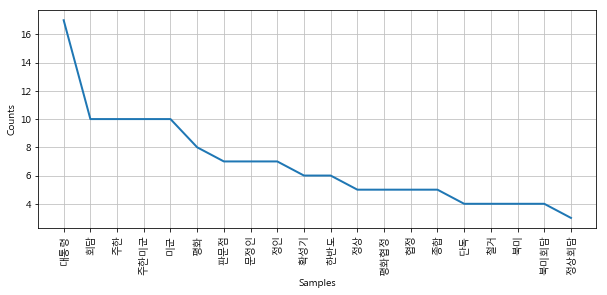

In [38]:
plt.figure(figsize=(10,4))
noun05.plot(20)
plt.show()

In [73]:
wordDf_eco.to_excel('data/keyword_economy.xlsx')

In [71]:
wordDf_eco.to_csv('data/keyword_economy.csv')

In [56]:
support = pd.read_csv('data/support_president.csv', sep=',', encoding='UTF-8')
support.drop('Unnamed: 0', axis=1, inplace=True)
support

,날짜,지지율
0,201705,78.1%
1,201706,79.0%
2,201707,77.0%
3,201708,76.0%
4,201709,65.0%
5,201710,73.0%
6,201711,75.0%
7,201712,68.5%
8,201801,64.0%
9,201802,64.0%


In [5]:
news = pd.read_csv('data/naver_news_top5.csv', encoding='UTF-8')
news.drop('Unnamed: 0', axis=1, inplace=True)
news.head()

,날짜,제목,내용
0,20171101,30대 빚내서 집 사느라 허덕인다,ㆍ상반기 가계대출 증가분의 61%나 차지… 평균 대출액도 5년 전보다 2400만원 ...
1,20171101,"[종합]검찰, 롯데 신격호에 징역 10년·벌금 3000억 구형",【서울=뉴시스】조성봉 기자 = ‘롯데 오너가 비리’ 신격호 롯데그룹총괄회장이 1일 ...
2,20171101,"규제의 칼날에도 집값 상승, 왜?…'버티기'에 양극화 심화",【서울=뉴시스】박진희 기자 = 가계부채 종합대책 발표를 앞둔 23일 오전 김동연 경...
3,20171101,429조 예산전쟁 개막… 공무원 증원 최대 쟁점,"오늘부터 한달간 국회 심의최저임금 지원, SOC예산 놓고여야 치열한 줄다리기 예상김..."
4,20171101,"검찰, '채용비리' 이병삼 前금감원 부원장보 구속영장 청구(종합)",[연합뉴스TV 제공] (서울=연합뉴스) 김기훈 기자 = 금융감독원의 채용비리 ...
